In [6]:
import numpy as np
import sympy as sp
import random
from typing import Callable, Tuple
import matplotlib.pyplot as plt

In [2]:
w1, w2 = sp.symbols('w1 w2')
sigma, a, b = sp.symbols('sigma a b')
R11, R12, R21, R22 = sp.symbols('R11 R12 R21 R22')

R = sp.Matrix([[R11, R12], [R21, R22]])
w_vec = sp.Matrix([w1, w2])
quadratic_form = (w_vec.T * R * w_vec)[0, 0]

E_expr = 1/2 * sigma ** 2 - (a * w1 + b * w2) + 1/2 * quadratic_form
derivative_w1 = sp.diff(E_expr, w1)
derivative_w2 = sp.diff(E_expr, w2)

gradE = sp.lambdify((w1, w2, sigma, a, b, R11, R12, R21, R22), [derivative_w1, derivative_w2], 'numpy')

In [244]:
sigma = np.random.rand(); a = 0.9; b = 0.2; c = 0.6; R = np.matrix([[1, c], [c, 1]]); eta = 0.04; precision = 10 ** -3


E = lambda w: 1 / 2 * sigma ** 2 - np.array([a,b]) @ w + 1 / 2 * np.transpose(w) @ R @ w
print(f'E = 1 / 2 * {sigma} ** 2 - {np.array([a, b])} * w + 1 / 2 * wT * {R} * w')

E = 1 / 2 * 0.3272273198992336 ** 2 - [0.9 0.2] * w + 1 / 2 * wT * [[1.  0.6]
 [0.6 1. ]] * w


In [245]:
def gradient_descent(
        E: Callable[[np.ndarray], np.ndarray],
        gradE: Callable[[float, float, float, float, float, float, float, float, float], Tuple[float, float]],
        precision: float,
        eta: float
    ) -> np.ndarray:
    i = 0
    w_i = []
    w = np.array([random.uniform(-20, 20), random.uniform(-20, 20)])
    print(f'starting target function value = {E(w)}\n')
    eps = 1

    while eps >= precision:
        i += 1
        print(f'iteration = {i}')
        grad = gradE(*w, sigma, a, b, R[0, 0], R[0, 1], R[1, 0], R[0, 1])
        print(f'gradient of E in {w} = {grad}')
        w_new = w - eta * np.array(grad)
        print(f'updated w:  w = {w_new}')
        eps = np.linalg.norm(w - w_new)
        print(f'E(w) = {E(w_new)}')
        print(f'eps = {eps}\n')
        w = w_new
        w_i.append(w)

    return w_i


stuff = gradient_descent(E, gradE, precision, eta)

starting target function value = [[74.35176292]]

iteration = 1
gradient of E in [6.59195534 7.6951289 ] = [np.float64(10.309032680607812), np.float64(8.372250545090642)]
updated w:  w = [6.17959403 7.36023888]
E(w) = [[66.4900788]]
eps = 0.5312185749758533

iteration = 2
gradient of E in [6.17959403 7.36023888] = [np.float64(9.695737360301324), np.float64(7.92389974767388)]
updated w:  w = [5.79176454 7.04328289]
E(w) = [[59.48430101]]
eps = 0.5008720557925007

iteration = 3
gradient of E in [5.79176454 7.04328289] = [np.float64(9.117734271945098), np.float64(7.501028457082475)]
updated w:  w = [5.42705517 6.74324175]
E(w) = [[53.24022641]]
eps = 0.47226857810828454

iteration = 4
gradient of E in [5.42705517 6.74324175] = [np.float64(8.573000218097315), np.float64(7.102178151585814)]
updated w:  w = [5.08413516 6.45915463]
E(w) = [[47.67406977]]
eps = 0.44530846340281394

iteration = 5
gradient of E in [5.08413516 6.45915463] = [np.float64(8.059627933735362), np.float64(6.72597387071

In [267]:
E([1,1])

matrix([[0.55353886]])

In [268]:
def plot_descent(w_i: np.ndarray, f: Callable[[np.ndarray], np.ndarray]) -> None:
    x_i = np.array([w[0] for w in w_i])
    y_i = np.array([w[1] for w in w_i])
    z_i = np.array([f(w).item() for w in w_i])

    fig = plt.figure(figsize=(14, 8))
    fig.suptitle('Gradient Descent')

    ax = fig.add_subplot(2, 1, 1)

    ax.plot(x_i, y_i)
    ax.scatter(x_i[0], y_i[0], color='green', s=20, label='Початок')
    ax.scatter(x_i[-1], y_i[-1], color='red', s=20, label='Мінімум')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Trajectory of w(t) in W')
    ax.legend()
    ax.grid(True)
    ax.axis('equal')

    ax = fig.add_subplot(2, 1, 2, projection='3d')


    margin = 2.0
    x_min, x_max = min(x_i.min(), -5) - margin, max(x_i.max(), 5) + margin
    y_min, y_max = min(y_i.min(), -5) - margin, max(y_i.max(), 5) + margin

    x_vals = np.linspace(x_min, x_max, 50)
    y_vals = np.linspace(y_min, y_max, 50)
    X, Y = np.meshgrid(x_vals, y_vals)

    X_flat = X.flatten()
    Y_flat = Y.flatten()
    points = np.column_stack((X_flat, Y_flat))
    Z_flat = np.array([f(point) for point in points])

    Z = Z_flat.reshape(X.shape)

    z_min, z_max = Z.min(), Z.max()
    z_range = z_max - z_min
    ax.set_zlim(z_min - 0.005*z_range, z_max + 0.005*z_range)

    surf = ax.plot_surface(X, Y, Z, alpha=0.5, cmap='viridis', linewidth=0)

    ax.plot(x_i, y_i, z_i, 'r-', linewidth=3, markersize=4, label='Траєкторія')
    ax.scatter(x_i[0], y_i[0], z_i[0], color='green', s=20, label='Початок')
    ax.scatter(x_i[-1], y_i[-1], z_i[-1], color='red', s=20, label='Мінімум')

    ax.set_title('Trajectory of w(t) in 3D space')
    ax.legend(loc='upper right')

    plt.show()

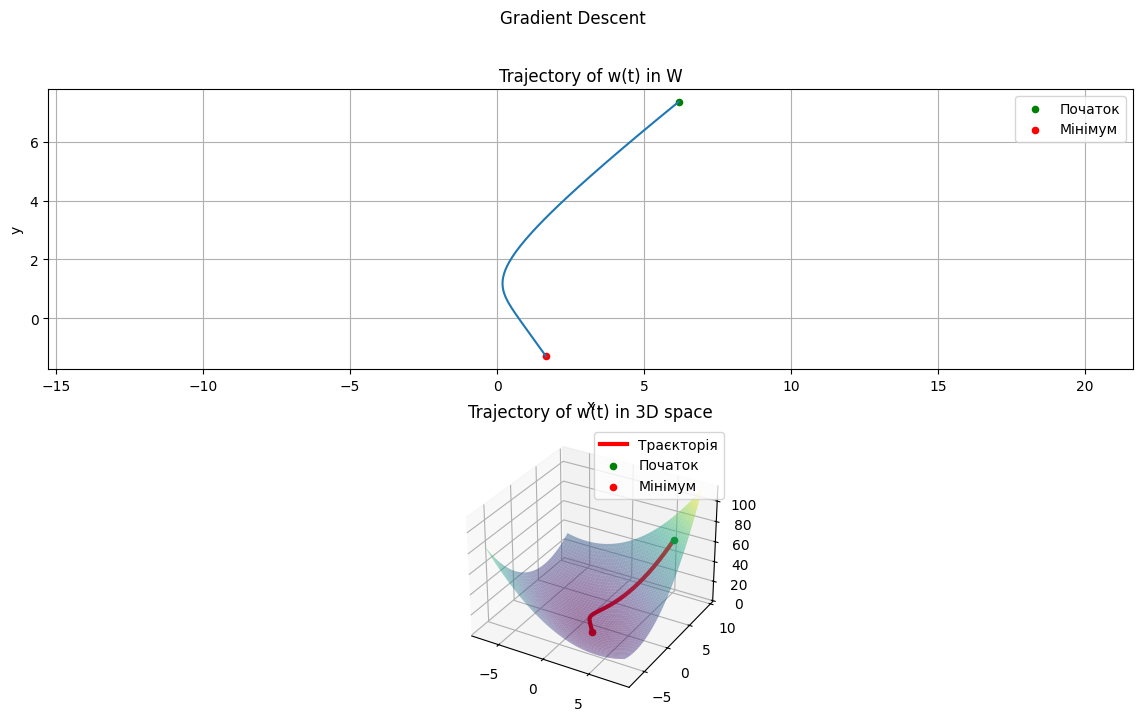

In [269]:
plot_descent(stuff, E)